In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from config import db_username, db_password, db_host, db_port, db_name
import psycopg2


In [3]:
# Create an SQLAlchemy engine to connect to the PostgreSQL database
engine = create_engine(f'postgresql://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}')

# Establish a connection to the database
connection = engine.connect()

In [5]:
# Use Pandas to execute the query and read the data into a DataFrame
salaries_df = pd.read_sql('SELECT * FROM salaries', connection)

# Display the DataFrame with salaries data
salaries_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [6]:
#print lowest salary 
print(salaries_df.min())

emp_no    10001
salary    40000
dtype: int64


In [7]:
#print highest salary
print(salaries_df.max())

emp_no    499999
salary    129492
dtype: int64


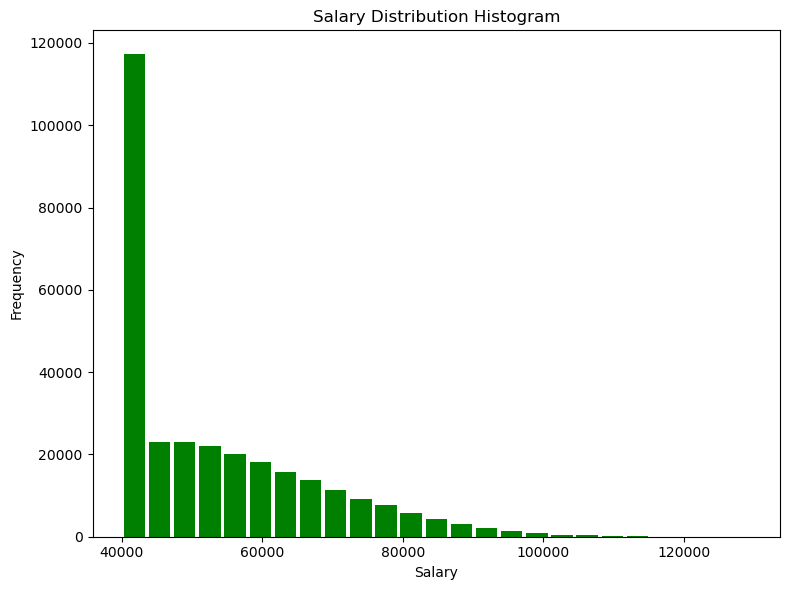

In [8]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(salaries_df['salary'], bins=25, rwidth=0.85,color='g')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution Histogram')
plt.tight_layout()
# Show the plot
plt.show()

In [9]:
# Use Pandas to execute the query and read the data into a DataFrame
Avg_salaries_df = pd.read_sql('''SELECT t.title, AVG(s.salary) AS average_salary
                                FROM titles t
                                LEFT JOIN employees e ON t.title_id = e.emp_title_id
                                LEFT JOIN salaries s ON s.emp_no = e.emp_no
                                GROUP BY t.title''', connection)

# Display the DataFrame 
Avg_salaries_df = Avg_salaries_df.sort_values(by='average_salary')
Avg_salaries_df

,title,average_salary
5,Senior Engineer,48506.799871
0,Engineer,48535.336511
3,Assistant Engineer,48564.434447
1,Technique Leader,48582.896092
2,Manager,51531.041667
4,Staff,58465.382850
6,Senior Staff,58550.172704


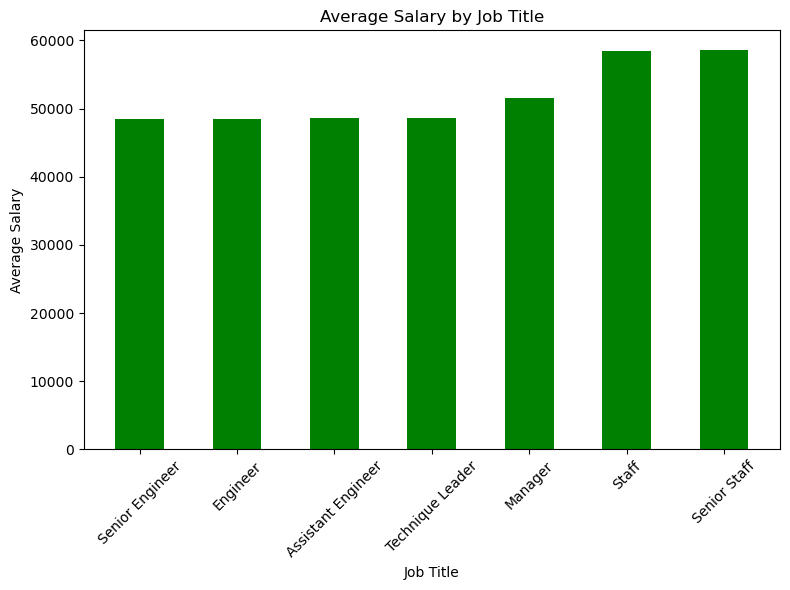

In [10]:
# Create a bar_chart
plt.figure(figsize=(8, 6))
plt.bar(Avg_salaries_df['title'], Avg_salaries_df['average_salary'],width = 0.5,color='g')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.title('Average Salary by Job Title')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

In [11]:
connection.close()